# Function Definition

In [79]:
from scipy import optimize
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [3]:
def F(m, phi_i, d = 1*10**(-3), lam = 650*10**(-9)):
    """"
    This function takes as inputs the parameters from our experiment and returns another function, only in terms
    of n, such that it can later be optimized while taking our parameteres as fixed.
    
    Parameters
    -------
    m : the number of fringes counter
    d : thickness of the material plate
    lam : wavelength of the light source
    phi_i : angle through which we rotate the plate, to the normal angle of mirror
    
    Returns
    -------
    funk_to_optimize : a function containing the parameters as fixed, in terms of refractive index 'n'
    
    Notes
    -------
    
    """
    
    def funk_to_optimize(n):
        
        phi_r = math.asin(math.sin(phi_i)/n)
        
        return m - (2*d)/lam * (n*(1/math.cos(phi_r) - 1)
                                + 1 - (math.cos(phi_i - phi_r)/math.cos(phi_r)))
    
    return funk_to_optimize

In [4]:
def refrakt(input_data, x0 = 1.4, x1 = 1.5):
    """
    This one takes a list of data and returns the refractive index
    
    Params
    -------
    input_data : experimental data that contains number of fringes 
                 and angle of rotation
    x0 = initial guess for optimization algorithm
    x1 = second guess for optimization algorithm
    
    Returns
    -------
    output_data : list of refractive indices
    
    Example
    -------
    >>>refrakt([[20, 10.4], [40, 14.7]])
    [4.79289677e+34, 4.28057195e+31]
    
    Notes
    -------
    We know that we are measuring glass-like material, so we expect 
    the refractive index to be somewhere between 1.4 and 1.5, hence 
    the default values for the initial two guesses
    
    """
    output_data = []
    
    for arr in input_data:
        
        m = arr[0]
        phi_i = arr[1]
    
        func = F(m, phi_i)
        n = optimize.root_scalar(func, x0 = x0, x1 = x1)
    
        output_data.append(n.root)
        
    return output_data

# Data Import and Analysis

In [59]:
def load(url):
    run = pd.read_csv(url, dtype = "float").to_numpy()
    
    run[:,1] = np.radians(data[:,1])
    
    return run

In [61]:
runB1 = load("https://raw.githubusercontent.com/diodeamy/Waves-And-Optics/main/data/data_BR1.csv")
runB2 = load("https://raw.githubusercontent.com/diodeamy/Waves-And-Optics/main/data/data_BR2.csv")
runB3 = load("https://raw.githubusercontent.com/diodeamy/Waves-And-Optics/main/data/data_BR3.csv")
runW1 = load("https://raw.githubusercontent.com/diodeamy/Waves-And-Optics/main/data/data_WR1.csv")
runW2 = load("https://raw.githubusercontent.com/diodeamy/Waves-And-Optics/main/data/data_WR2.csv")

In [6]:
#here we wish to make a function that returns the refractive indeces for each pair of angle-fringe 
#we also wish for it to compute y and x values to be plotted for the error function (this will need to take
#the errors of angle and lalal into account)

In [86]:
def matias(run):
    
    lam = 650*10**(-9)
    d = 1*10**3
    phi_i = run[:,1]
    m = run[:,0]
    
    n = np.array(refrakt(run))
    
    phi_r = np.arcsin(np.sin(phi_i/n))
    
    y = (lam/2*d)*m - 1 + np.cos(phi_i - phi_r)/np.cos(phi_r)
    
    x = 1/np.cos(phi_r) - 1
    
    return (x, y)

In [87]:
(x, y) = matias(runB1)

/Users/ruxi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 7.590522150624823e+24 reached.
  warnings.warn(msg, RuntimeWarning)
/Users/ruxi/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/zeros.py:341: RuntimeWarning: Tolerance of 1.1113529697057186e+24 reached.
  warnings.warn(msg, RuntimeWarning)


In [91]:
# lin reg with errors: https://stackoverflow.com/questions/22670057/linear-fitting-in-python-with-uncertainty-in-both-x-and-y-coordinates

# look at this after you have errors

result = linregress(x, y)
result

LinregressResult(slope=1.5322068676842604, intercept=-0.00018446892670482412, rvalue=0.9992915279314059, pvalue=1.9568409239738186e-41, stderr=0.010905500770769672, intercept_stderr=0.00030873436420126844)

In [89]:
result.slope

1.5322068676842604

<ErrorbarContainer object of 3 artists>

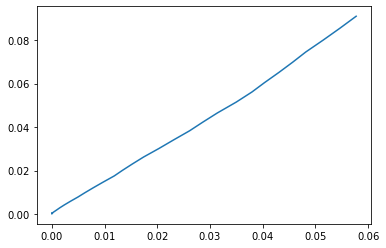

In [90]:
plt.errorbar(x, y)

In [ ]:
runB1[:, 0]

In [ ]:
np.arcsin((np.sin([0.017453292519943295, 0.03490658503988659,0.05235987755982989,
       0.06981317007977318, 0.08726646259971647, 0.10471975511965978,
       0.12217304763960307, 0.13962634015954636, 0.15707963267948966]))/1.479)

In [ ]:
y1 = (650*10**(-9)/(2*1*10**(-3))) + math.cos(0.12217304763960307 - 0.08249336)/0.08249336
print(y1)